In [58]:
from music21 import *
from IPython.display import Image


def music(notes: str, midi=False):
    s = stream.Score()
    part = stream.Part()
    
    info_pos = []
    
    for i in range(0, len(notes)):
        if notes[i] == "^":
            info_pos.append(i)
    info_string = notes[info_pos[0] + 1: info_pos[1]]
    info = info_string.split(" ")
    # if info[0].lower == "treble":
    #     part.append(clef.TrebleClef())
    # elif info[0].lower == "bass":
    #     part.append(clef.BassClef())
    # elif info[0] == "None":
    #     part.append(clef.NoClef())
    part.append(clef.TrebleClef())
    keys = [["cb", -7], ["gb", -6], ["db", -5], ["ab", -4], ["eb", -3], ["bb", -2], ["f", -1], ["c", 0], ["g", 1], ["d", 2], ["a", 3], ["e", 4], ["b", 5], ["f#", 6], ["c#", 7]]
    for k in keys:
        if info[1].lower() == k[0]:
            part.append(key.KeySignature(k[1]))
    part.append(meter.TimeSignature(info[2]))
    notes = notes[info_pos[1] + 1:]
    
    if len(info) == 4:
        info_tempo = int(info[3])
    else:
        info_tempo = 40

    split_notes = notes.split(" ")
    for n in split_notes:
        if n[0] == "!":
            part.append(harmony.ChordSymbol(n[1:]))
        elif n == "^":
            part.append(layout.SystemLayout(isNew=True))
        else:
            is_chord = False
            is_tie = "none"
            note_and_length = n.split("/")
            if "(" in note_and_length[0]:
                is_chord = True
                chord_name = (
                    note_and_length[0].replace("(", "").replace(")", "").split("$")
                )
            else:
                note_name = note_and_length[0]
            if "{" in note_and_length[1]:
                is_tie = "start"
                note_and_length[1] = note_and_length[1].replace("{", "")
            if "}" in note_and_length[1]:
                is_tie = "stop"
                note_and_length[1] = note_and_length[1].replace("}", "")
            if "*" in note_and_length[1]:
                length_and_col = note_and_length[1].split("*")
                note_length = length_and_col[0]
                note_col = length_and_col[1]
            else:
                note_length = note_and_length[1]
                note_col = ""
            if note_length in ["0.3", ".3"]:
                note_length = 0.333333333
            else:
                note_length = float(note_length)
            if is_chord:
                add_n = chord.Chord(chord_name, quarterLength=note_length)
            else:
                if note_name.lower() == "r":
                    add_n = note.Rest(quarterLength=note_length)
                elif note_name in ["slash", "s"]:
                    add_n = note.Unpitched()
                    add_n.notehead = "slash"
                    add_n.stemDirection = "noStem"
                    add_n.volume.velocity = 0
                else:
                    add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            if note_col != "":
                add_n.style.color = note_col

            part.append(add_n)

    s.append(tempo.MetronomeMark(number=info_tempo))
    s.append(part)

    swung_part = stream.Part()
    
    if midi == True:
        step = 0.0
        for item in part:
            if isinstance(item, note.Note) or isinstance(item, note.Rest):
                if str(step)[-1] == "9":
                    step = float(round(step))
                elif str(step)[-1] == "2":
                    step = float(round(step))
                if isinstance(item, note.Note):
                    new_note = note.Note(item.pitch)
                    if item.tie:
                        if "start" in str(item.tie):
                            new_note.tie = tie.Tie("start")
                        if "stop" in str(item.tie):
                            new_note.tie = tie.Tie("stop")
                        if "continue" in str(item.tie):
                            new_note.tie = tie.Tie("continue")
                else:
                    new_note = note.Rest()
                if str(step)[-2:] == ".0":
                    if item.quarterLength == 0.5:
                        new_note.quarterLength = (0.333333333 * 2)
                    elif item.quarterLength == 2:
                        new_note.quarterLength = 1 + (0.333333333 * 2)
                    elif str(item.quarterLength) == "1/3":
                        new_note.quarterLength = 0.333333333
                    else:
                        new_note.quarterLength = item.quarterLength
                elif str(step)[-2:] == ".5":
                    if item.quarterLength == 0.5:
                        new_note.quarterLength = 0.333333333
                    elif item.quarterLength == 1.5:
                        new_note.quarterLength = 1 + .333333333
                    else:
                        new_note.quarterLength = item.quarterLength
                if str(item.quarterLength) == "1/3":
                    new_note.quarterLength = 0.333333333
                swung_part.append(new_note)
                step += item.quarterLength
            else:
                swung_part.append(item)
        swung_s = stream.Stream()
        guitar = instrument.Guitar()
        swung_s.insert(0, tempo.MetronomeMark(number=info_tempo))
        swung_s.append(guitar)
        swung_s.append(swung_part)
        return swung_s.show("midi")
    else:
        return Image(filename=s.write("musicxml.png"))

# Modern Jazz Piano
## A Study in Harmony and Improvisation
by Brian Waite

# Preface
It is not possible to acquire the skills of any of the performing arts just by reading a book and this is particularly so in the case of jazz. Nevertheless, as in all things, an understanding of the underlying principles can play a large part in the development of such skills and it is hoped that this book will make a contribution by providing the necessary groundwork.

To my knowledge the diversity of subject matter discussed in the following pages has not been dealt with in a singie volume before, although there are other jazz text books available which will provide a rich source of further reading and these are listed in the bibliography.

The idea to write such a book was conceived after pianist Gordon Beck had invited me to assist in the teaching of jazz piano at the Treforest Summer School. This was formerly the Barry Summer School started in 1967 at which time it was the only residential jazz course of its kind in Great Britain. It was as a student in the early years of the School that I had the fortune to meet and learn from some of Britain's foremost jazz players and it has been my further good fortune to have an opportunity to pass on that knowledge to other students.

This book has been designed to cater for beginners and more advanced players alike and it is hoped that it will be found as useful to the non-keyboard player as to the aspiring jazz pianist.

in understanding the theory the usefulness of the piano cannot be overemphasized for it is at the keyboard that harmonies can be heard en bloc and this is as much an asset to the horn player as to the pianist. it is not necessary for the horn player to be proficient at the keyboard to play the examples of harmonies in this book. Played as block chords, however slowly, they will provide an insight into the pianist’s role as a member of the rhythm section.

A participation in music at any level involves a continual learning process and for this reason alone it would be impossible to write a book which is completely exhaustive. However, | am confident that even the most advanced player will find something in these pages which will serve as a springboard for further developement.

# Fundamentals

## 1.1 Introduction

It would be difficult to understand the theory of jazz piano without first grasping the basic principles of melody and harmony applicable te all forms of music. Although such matters are dealt with extensively in other works I think it is important to include them here as a foundation for more advanced study.

I have had to assume some very basic knowledge on the part of the reader but if there is any difficulty for absolute beginners the bibliography will be found useful.

In writing this section | have attempted to be as brief yet concise as possible and | have avoided venturing into areas which are not directly relevant to the art of jazz. | have also related everything to the major scale for simplicity. The minor scale is introduced in Section Two, the theory being the same for both scales.

## 1.2 To Read or Not to Read

The ability to read music varies with individuals, ranging from the non-reader to the highly proficient sight reader.

The session player, with all the demands that studio work imposes, must of necessity fall into the latter category. At the other extreme, there are excellent jazz players who cannot read a note or chord.

Clearly, every musician should aspire to be a good reader for all the advantages that it has to offer and for most players this will involve diligent practice and hard-won experience. However, the examples in this book do not require a high level of reading skill. In fact, if the theory is understood it's possible to play them with nothing more than a familiarity with the notes of the stave as they relate to the keyboard.

On a different level, the ability to read chord symbols is essential, particularly for the pianist who, as a member of a rhythm section, will frequently be presented with a chord chart. In this respect I have devoted one section of the book to chord symbols for they can be a source of confusion due to the different ways they can be written.

I do not propose to dwell at length on the subject of reading for it is adequately covered elsewhere and an in-depth study would be beyond the scope of this book. Despite this | feel that two pieces of advice would not be out of place here. First, it must be understood that in reading music, jazz involves a different interpretation to classical forms, a triplet feel being used in jazz, as shown in the example below:

WRITTEN:


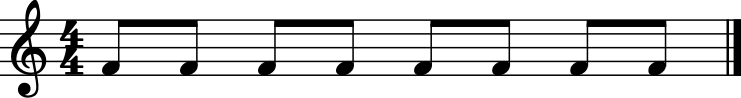

In [59]:
notes = "^treble c 4/4^f4/.5 f4/.5 f4/.5 f4/.5 f4/.5 f4/.5 f4/.5 f4/.5"
print("WRITTEN:")
music(notes)

PLAYED:


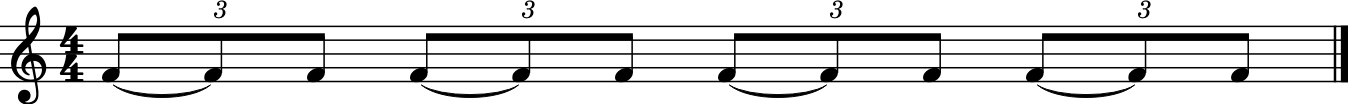

In [60]:
notes = "^treble c 4/4^f4/.3{ f4/.3} f4/.3 f4/.3{ f4/.3} f4/.3 f4/.3{ f4/.3} f4/.3 f4/.3{ f4/.3} f4/.3"
music(notes, True)
print("PLAYED:")
music(notes)

Second, it is important to avoid reading material which is far too difficult as this may result in the rhythmic continuity being broken and probably the player's confidence also!

If any reader is totally unfamiliar with musical notation he would do well to refer to one of the books listed in the bibliography, one section of which is devoted to basic music.

Where examples are given on the stave, | have deliberately avoided transposing into all keys. The player should do this for himself without reference to written music. This way he will gain a better understanding of the structure of chords and scales and develop a visual memory of their shapes. In short, he will develop a sense of architecture of the keyboard.

## 1.3 Scales

Scales are the building blocks of music and have an important role to play in improvisation. The scale with which most people are already familiar is the *Major Scale* for it is the one which is most commonly used in popular music forms, the easiest example being the sequence of ‘white’ notes from C to C’.

This scale represents the tip of a large iceberg for there are many others which can be formed to create a musical pathway between two notes which are an octave apart. The variety of scales will be considered in a later section in connection with improvisation.

For the present purpose the major scale will serve to illustrate some basic principles and for simplicity the scale Starting on C will be used in the examples.

*ie* **C D E F G A B C**

Each note or *degree* of the scale has a name and a Roman numeral which give an indication of its function and position within the scale. These are as follows:

| Note | Roman Numeral | Name |
| --- | --- | --- |
| C | I | Tonic |
| D | II | Supertonic |
| E | III | Mediant |
| F | IV | Subdominant |
| G | V | Dominant |
| A | VI | Submediant |
| B | VII | Leading Note |
| C | (VIII) | (Tonic) |

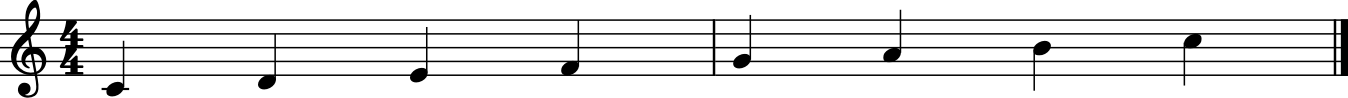

In [61]:
notes = "^treble c 4/4^c4/1 d4/1 e4/1 f4/1 g4/1 a4/1 b4/1 c5/1"
music(notes, True)
music(notes)

The *tonic* (I) defines the Starting point or tonal centre and is therefore the most important note in the scale. The *dominant* (V) is fairly central in the scale and is next in importance. It has a melodic tendency to move up or down to the tonic. The *subdominant* (IV) is just below the dominant and has a melodic tendency to move down to the mediant. The *mediant* (III) is so called because it lies midway between the tonic and the dominant. Likewise the *submediant* (VI) lies midway between the subdominant and the upper tonic. The *supertonic* (VII) is is just above the tonic and the *leading note* (VII) is so called because it has a strong tendency to lead up to the tonic.

This tendency for melodic movement is important in understanding harmonic progression, as will be seen later. In order to appreciate this movement the tonic has to be played first to establish the tonal centre.

V to I, V to I, IV to III, VII to I


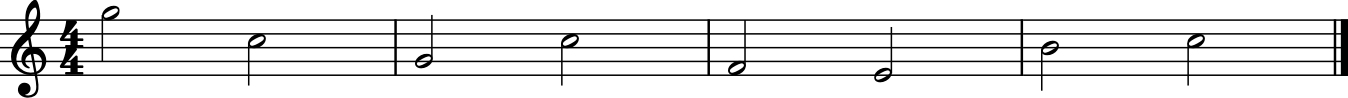

In [62]:
notes = "^treble c 4/4^g5/2 c5/2 g4/2 c5/2 f4/2 e4/2 b4/2 c5/2"
music(notes, True)
print("V to I, V to I, IV to III, VII to I")
music(notes)

## 1.4 Intervals

The musical distance between two notes is known as an interval. In Western music the smallest interval is the semitone or half-tone and is the distance between adjacent notes such as C and Db or E and F. It follows logically that an interval comprising two semitones is a fone or whole-tone as for example between F and G or Bb and C.

It would be possible to describe any interval in terms of the number of tones and semitones it contains but this would be a cumbersome means of identification. An interval is properly identified according to type and size. There are five types of interval:

> **Perfect<br>Major<br>Minor<br>Augmented<br>Diminished**

The size of an interval is described numerically and can be explained by reference to a scale. The interval between I and II is a *second*; that between I III is a *third*; that between I and IV is a *fourth*; and so on. However, the type of interval will differ according to the scale used. If we consider the major scale with the tonic as a reference, the intervals which occur naturally are as follows:

Unison, Major Second, Major Third, Perfect Fourth, Perfect Fifth, Major Sixth, Major Seventh, Octave


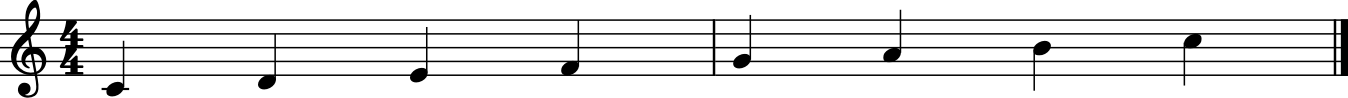

In [63]:
notes = "^treble c 4/4^c4/1 d4/1 e4/1 f4/1 g4/1 a4/1 b4/1 c5/1"
music(notes, True)
print("Unison, Major Second, Major Third, Perfect Fourth, Perfect Fifth, Major Sixth, Major Seventh, Octave")
music(notes)

PERFECT INTERVALS
Unison, Fourth, Fifth, Octave


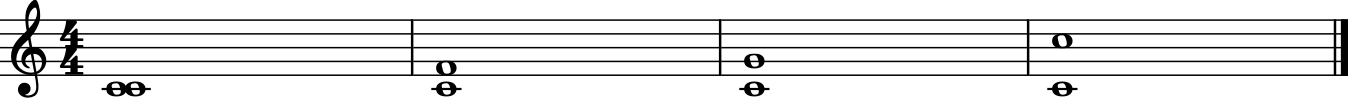

In [64]:
notes = "^treble c 4/4^(c4$c4)/4 (c4$f4)/4 (c4$g4)/4 (c4$c5)/4"
music(notes, True)
print("PERFECT INTERVALS")
print("Unison, Fourth, Fifth, Octave")
music(notes)

MAJOR INTERVALS
Second, Third, Sixth, Seventh


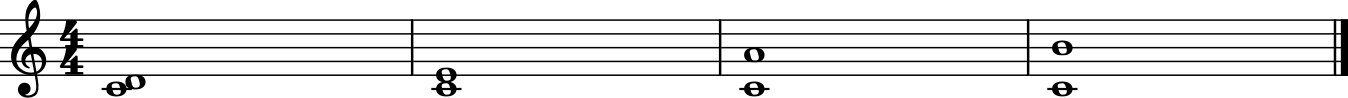

In [65]:
notes = "^treble c 4/4^(c4$d4)/4 (c4$e4)/4 (c4$a4)/4 (c4$b4)/4"
music(notes, True)
print("MAJOR INTERVALS")
print("Second, Third, Sixth, Seventh")
music(notes)

The unison, fourth, fifth, and octave are *perfect intervals*. The second, third, sixth and seventh are *major intervals*. If a major interval is reduced by a semitone the result is a *minor interval*. If a perfect or major interval is raised by a semitone the result is an *augmented interval*. If a perfect or minor interval is reduced by a semitone the result is a *diminished interval*.

MINOR INTERVALS
Second, Third, Sixth, Seventh


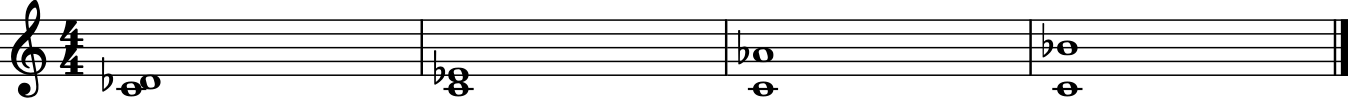

In [66]:
notes = "^treble c 4/4^(c4$d-4)/4 (c4$e-4)/4 (c4$a-4)/4 (c4$b-4)/4"
music(notes, True)
print("MINOR INTERVALS")
print("Second, Third, Sixth, Seventh")
music(notes)

AUGMENTED INTERVALS
Second, Fourth, Fifth, Sixth


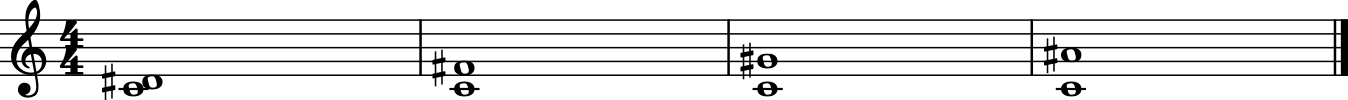

In [67]:
notes = "^treble c 4/4^(c4$d#4)/4 (c4$f#4)/4 (c4$g#4)/4 (c4$a#4)/4"
music(notes, True)
print("AUGMENTED INTERVALS")
print("Second, Fourth, Fifth, Sixth")
music(notes)

DIMINISHED INTERVALS
Fourth, Fifth, Sixth, Seventh


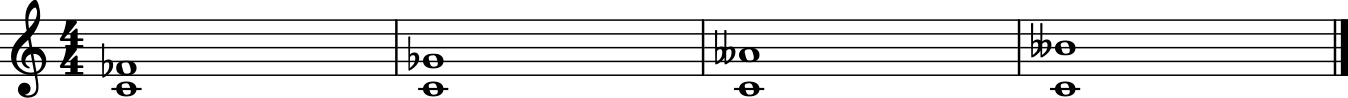

In [68]:
notes = "^treble c 4/4^(c4$f-4)/4 (c4$g-4)/4 (c4$a--4)/4 (c4$b--4)/4"
music(notes, True)
print("DIMINISHED INTERVALS")
print("Fourth, Fifth, Sixth, Seventh")
music(notes)

We now have a means of identifying every interval within an octave, taking account of all the semitones.

## 1.5 Compound Intervals

When an interval exceeds an octave it is said to be compound. Such intervals are also given numerical descriptions as follows:

| Base | Interval | Compound Interval |
| --- | --- | --- |
| Octave | Second | Ninth |
| Octave | Third | Tenth |
| Octave | Fourth | Eleventh |
| Octave | Fifth | Twelfth |
| Octave | Sixth | Thirteenth |

Ninth, Tenth, Eleventh, Twelfth, Thirteenth


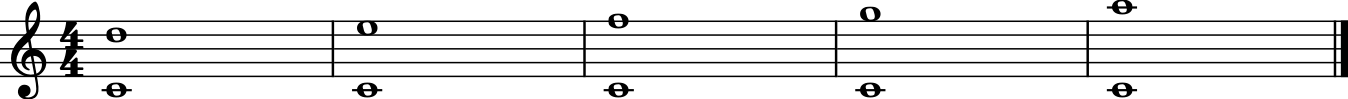

In [69]:
notes = "^treble c 4/4^(c4$d5)/4 (c4$e5)/4 (c4$f5)/4 (c4$g5)/4 (c4$a5)/4"
music(notes, True)
print("Ninth, Tenth, Eleventh, Twelfth, Thirteenth")
music(notes)

## 1.6 Tones and Semitones

I started the section on intervals by refering to tones and semitones. We have now seen that these intervals could be alternatively described as major and minor seconds respectively. However, the concept of tones and semitones is useful fn describing the construction of scales in terms of successive intervals. Considering the scale of C major, we see that the interval construction is as follows:

T T S T T T S


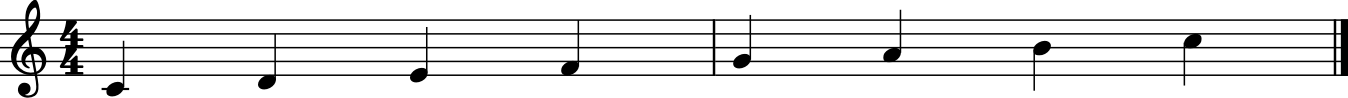

In [70]:
notes = "^treble c 4/4^c4/1 d4/1 e4/1 f4/1 g4/1 a4/1 b4/1 c5/1"
music(notes, True)
print("T T S T T T S")
music(notes)

The interval sequence T T S T T T S is unique to the major scale wherever it starts. If a major scale is to be commenced on any note other than C, 'black' notes will have to be introduced to maintain this pattern of intervals. Hence the need for key signatures for different scales. All other types of scale have a unique sequence of intervals which can be described by this method.

## 1.7 Interval Shorthand

It is often convenient to use a shorthand method to describe intervals. As this is used in a later section of the book I have included it here for reference and it is as follows:

| Interval | Shorthand |
| --- | --- |
| Minor Second | m2 |
| Major Second | M2 |
| Minor Third | m3 |
| Major Third | M2 |
| Perfect Fourth | p4 |
| Augmented Fourth | a4 |
| Dimished Fifth | d5 |
| Perfect Fifth | p5 |
| Augmented Fifth | a5 |
| Minor Sixth | m6 |
| Major Sixth | M6 |
| Diminished Seventh | d7 |
| Minor Seventh | m7 |
| Major Seventh | M7 |

There is no need to include the unison and octave in this shorthand system.

## 1.8 Basic Harmony

Harmony is defined as the simultaneous sounding of two or more notes and the result of such combination is a chord. In Western music the basis for the harmonic system is a chord comprising three notes and known as a *triad*.

A triad consists of a *root* or *fundamental note*, a *third* and a *fifth*. There are four types of triad, each having a different combination of intervals. These are as follows:

| Triad | Third | Fifth |
| --- | --- | --- |
| Major Triad | major 3rd | perfect 5th |
| Minor Triad | minor 3rd | perfect 5th |
| Augmented Triad | major 3rd | augmented 5th |
| Diminished Triad | minor 3rd | diminished 5th |

In the example below, the four types are shown on the same root for comparison:

C Major Triad, C Minor Triad, C Augmented Triad, C Diminished Triad


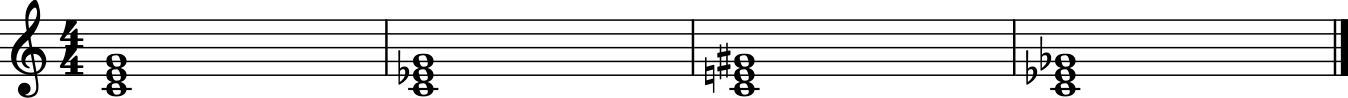

In [71]:
notes = "^treble c 4/4^(c4$e4$g4)/4 (c4$e-4$g4)/4 (c4$e4$g#4)/4 (c4$e-4$g-4)/4"
music(notes, True)
print("C Major Triad, C Minor Triad, C Augmented Triad, C Diminished Triad")
music(notes)

Note that the third determines whether a chord is a major or minor.

The major triad is a naturally occurring phenomenon. When a single note is played on the piano the vibrations set up within the string are complex and in addition to producing the predominant fundamental note, they also create higher notes known as *overtones* or *partials*. These are weaker than the fundamental, although a good ear will be able to hear the first three or four overtones. The series of notes thus produced is known as the *harmonic series* and the fundamental note together with the first five overtones are the constituent notes of a major triad. This is known as *Nature’s Chord*.

Low C is the Fundamental Note, everything after is are Numbered Overtones


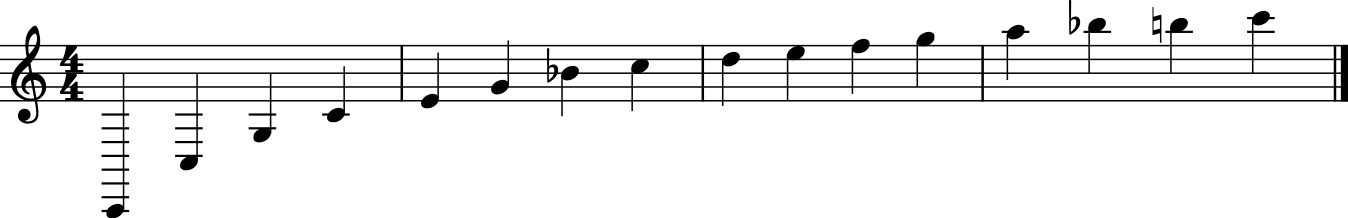

In [72]:
notes = "^treble c 4/4^c2/1 c3/1 g3/1 c4/1 e4/1 g4/1 b-4/1 c5/1 d5/1 e5/1 f5/1 g5/1 a5/1 b-5/1 b5/1 c6/1"
music(notes, True)
print("Low C is the Fundamental Note, everything after is are Numbered Overtones")
music(notes)

NATURE'S CHORD


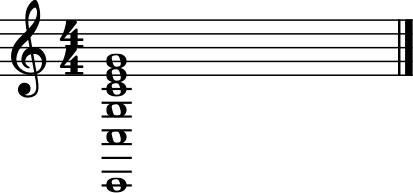

In [73]:
notes = "^treble c 4/4^(c2$c3$g3$c4$e4$g4)/4"
music(notes, True)
print("NATURE'S CHORD")
music(notes)

A triad can be played on each note of a scale and each triad thus formed will have the same name and Roman numeral as the note on which it is based.

Tonic, Supertonic, Mediant, Subdominant, Dominant, Submediant, Leading Note, Tonic


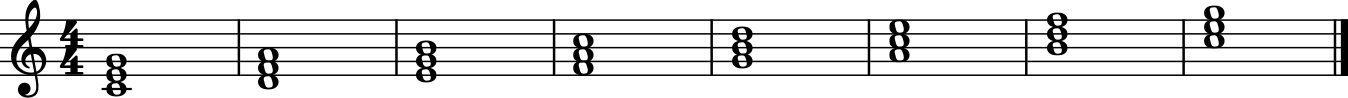

In [74]:
notes = "^treble c 4/4^(c4$e4$g4)/4 (d4$f4$a4)/4 (e4$g4$b4)/4 (f4$a4$c5)/4 (g4$b4$d5)/4 (a4$c5$e5)/4 (b4$d5$f5)/4 (c5$e5$g5)/4"
music(notes, True)
print("Tonic, Supertonic, Mediant, Subdominant, Dominant, Submediant, Leading Note, Tonic")
music(notes)

Note that in the major scale, the triads on I, IV, and V are major. Those on II, III, and VI are minor and the triad on VII is diminished.

## 1.9 Inversions

When a chord is played with the root as the lowest note it is said to be in *root position*. If the root is transposed to the top of the chord leaving the third as the lowest note, the chord is said to be in its *first inversion*. If the third is now transposed in the same way the fifth becomes the lowest note and the chord is in its *second inversion*.

This principle can be extended to a four-note chord which has three inversions. It is illustrated in the following example:

Root Position, 1st Inversion, 2nd Inversion, Root Position


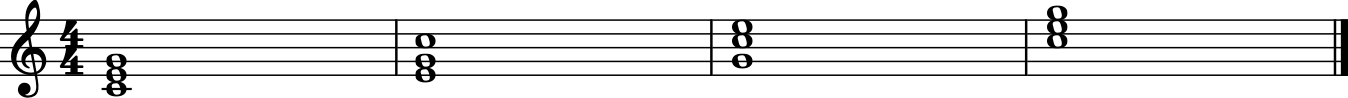

In [75]:
notes = "^treble c 4/4^(c4$e4$g4)/4 (e4$g4$c5)/4 (g4$c5$e5)/4 (c5$e5$g5)/4"
music(notes, True)
print("Root Position, 1st Inversion, 2nd Inversion, Root Position")
music(notes)

Root Position, 1st Inversion, 2nd Inversion, Root Position


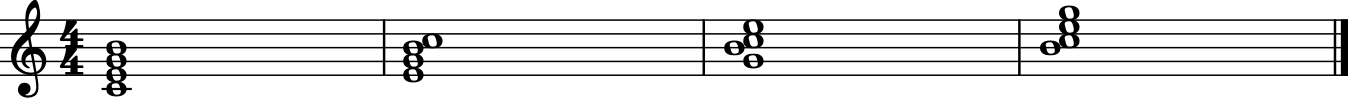

In [76]:
notes = "^treble c 4/4^(c4$e4$g4$b4)/4 (e4$g4$b4$c5)/4 (g4$b4$c5$e5)/4 (b4$c5$e5$g5)/4"
music(notes, True)
print("Root Position, 1st Inversion, 2nd Inversion, Root Position")
music(notes)

## 1.10 Chord Progressions - Cadences

Harmonic movement from one chord to another is known as a chord progression. For our purposes the study of such progressions can be simplified by understanding a few basic principles.

In the section on scales it was pointed cut that I, IV and V were the most important notes. The same is also true of the triads and for this reason, I, IV and V are known as primary triads. The other triads are known as secondary.

The primary triads are important because they establish tonality in music. After the tonic, the dominant is the most important chord in any key and this has a strong tendency to move to the tonic. This is the most important chord progression of all, ie dominant to tonic or V to I, and it is the key to an understanding of all jazz harmony. The progression V to Lis known as a Perfect Cadence and can be described as a musical full-stop. If this progression is preceded by another chord, the movement from that chord to V is known as an *Imperfect Cadence* or *Half-Close*. In traditional harmony, V is often preceded by the IV chord. We then have an extended progression IV to V to I.

> *ie* subdominant - dominant - tonic<br>imperfect cadence → perfect cadence

Each of the secondary chords, II, III, VI and VII also have a role to play in the harmonic system but for the time being we will only consider the use of the supertonic II chord.

The II chord, like the subdominant (JV) often precedes V. In fact IT and IV are closely related for they have notes in common and the chords are interchangeable.

If the substitution is made we now have a new progression II—V—I in which the supertonic is behaving like a subdominant. This alternative progression is important because the two chord changes II to Vand V to I each involve a downward movement of a fifth in the bass and this is particularly strong in jazz harmony. 

V I | IV V I | II V I


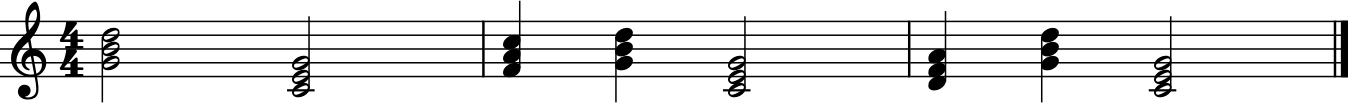

In [77]:
notes = "^treble c 4/4^(g4$b4$d5)/2 (c4$e4$g4)/2 (f4$a4$c5)/1 (g4$b4$d5)/1 (c4$e4$g4)/2 (d4$f4$a4)/1 (g4$b4$d5)/1 (c4$e4$g4)/2"
music(notes, True)
print("V I | IV V I | II V I")
music(notes)

Shared Notes:
F A | p 5th Down p 5th Down


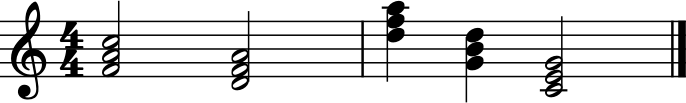

In [78]:
notes = "^treble c 4/4^(f4$a4$c5)/2 (d4$f4$a4)/2 (d5$f5$a5)/1 (g4$b4$d5)/1 (c4$e4$g4)/2"
music(notes, True)
print("Shared Notes:")
print("F A | p 5th Down p 5th Down")
music(notes)

## 1.11 The Dominant Seventh

The progression V—I is made stronger by the addition of a seventh in the dominant chord. To achieve this, a fourth note is added to the basic triad a minor seventh from the root. When this note is added the resulting discord from the minor seventh interval between the root and the seventh makes the chord feel unresolved. In the progression V—I the seventh in the dominant chord resolves to the third of the tonic and the third of the caminant chord resolves to the root of the tonic. Note that the dominant seventh is written with an Arabic numeral.

V7 I | (G) third to root | (B) seventh to third


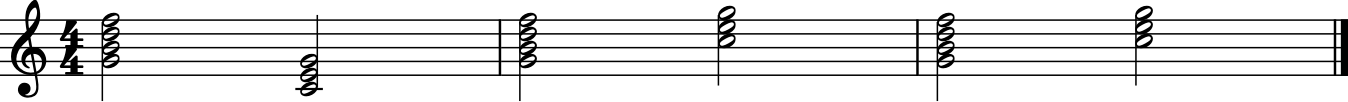

In [79]:
notes = "^treble c 4/4^(g4$b4$d5$f5)/2 (c4$e4$g4)/2 (g4$b4$d5$f5)/2 (c5$e5$g5)/2 (g4$b4$d5$f5)/2 (c5$e5$g5)/2"
music(notes, True)
print("V7 I | (G) third to root | (B) seventh to third")
music(notes)

Seventh chords can also be constructed on the other notes of a scale and are known as *secondary sevenths*. These are explained in Section Two.

## 1.12 Conclusion and Summary

The section on fundamentals is now concluded. To summarise:
- Aspire to learn or improve the reading of music
- Scales are the building blocks of music and are a basis for improvisation.
- The notes and chords which relate to scales have specific functions and are numbered I to VII.
- The most important chord progression in jazz harmony is the sequence II→V→I.

# 2. The Chord System

## 2.1 Seventh Chords (Major Scale)

The simple chords or triads discussed in Section One can be expanded to include a fourth note a seventh from the root. Seventh chords can be played on each note of a scale. Like the single notes of the scale, the chords have names and Roman numerals indicating their function and position in the scale. The names used are the same as for the single notes and the seventh chords formed in a major scale are as follows:

| Numeral | Degree | Name |
| --- | --- | --- |
| I | Tonic | Major Seventh |
| II | Supertonic | Minor Seventh |
| II | Mediant | Minor Seventh |
| IV | Subdominant | Major Seventh |
| V | Dominant | Dominant Seventh |
| VI | Submediant | Minor Seventh |
| VII | Leading Note | Half Diminished Seventh |

I II | III IV | V VI | VII


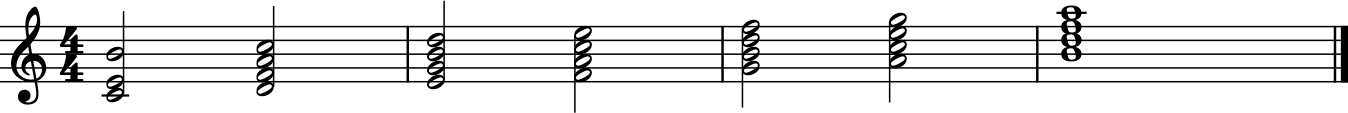

In [80]:
notes = "^treble c 4/4^(c4$e4$b4)/2 (d4$f4$a4$c5)/2 (e4$g4$b4$d5)/2 (f4$a4$c5$e5)/2 (g4$b4$d5$f5)/2 (a4$c5$e5$g5)/2 (b4$d5$f5$a5)/4"
music(notes, True)
print("I II | III IV | V VI | VII")
music(notes)

The I, II and V chords from the major scale are major, minor and dominant sevenths respectively. The following table shows the way in which each of these three chords is constructed in terms of the intervals within them.

| Chord Type | Root | Intervals from the root |
| --- | --- | --- |
| | | Third / Fifth / Seventh |
| Major Seventh | R | **Major / Perfect / Major** |
| Minor Seventh | R | Minor / Perfect / Minor |
| Dominant | R | Major / Perfect / Minor |

Note that the third and seventh are the only intervals which vary in this table and it is these intervals in their different combinations which determine the chord type. If each type of chord is played with the same root, the root and fifth would remain the same in each case and these are sometimes referred to as *stationary notes*. 

Major Seventh | R/5 - 3/7 | Dominant Seventh | R/5 - 3/7 | Minor Seventh | R/5 - 3/7


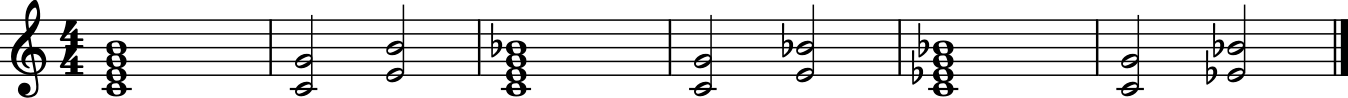

In [81]:
notes = "^treble c 4/4^(c4$e4$g4$b4)/4 (c4$g4)/2 (e4$b4)/2 (c4$e4$g4$b-4)/4 (c4$g4)/2 (e4$b-4)/2 (c4$e-4$g4$b-4)/4 (c4$g4)/2 (e-4$b-4)/2"
music(notes, True)
print("Major Seventh | R/5 - 3/7 | Dominant Seventh | R/5 - 3/7 | Minor Seventh | R/5 - 3/7")
music(notes)

Using seventh chords the progression II → V → I becomes:
> minor seventh → dominant seventh → major seventh

D Minor Seventh | G Dominant Seventh | C Major Seventh


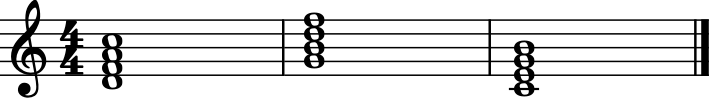

In [82]:
notes = "^treble c 4/4^(d4$f4$a4$c5)/4 (g4$b4$d5$f5)/4 (c4$e4$g4$b4)/4"
music(notes, True)
print("D Minor Seventh | G Dominant Seventh | C Major Seventh")
music(notes)

## 2.2 Seventh Chords (Minor Scale)
The minor key and scales have been deliberately omitted thus far for the sake of simplicity. The theory hitherto applied to the major scale applies equally to the minor scale. The functional names and numbering of the chords in the minor scale are the same as for a major scale although the chord types are different. Once again, the progression II-V-I is of prime importance.

The construction of the minor scale ts quite different to the major and there are two types of scale: *Harmonic Minor* and *Melodic Minor*. The melodic minor scale has two forms; ascending and descending. Although both the harmonic and melodic minor scales are used in improvisation, it is the harmonic minor scale which is best suited to a study of the minor scale chords.

Ascending Melodic Minor (A)


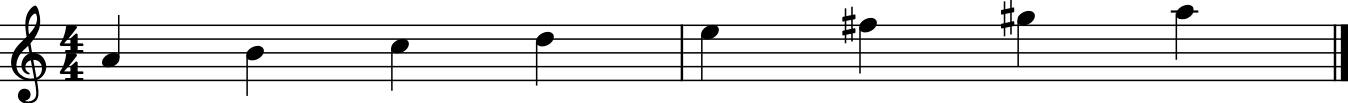

In [83]:
notes = "^treble c 4/4^a4/1 b4/1 c5/1 d5/1 e5/1 f#5/1 g#5/1 a5/1"
music(notes, True)
print("Ascending Melodic Minor (A)")
music(notes)

Descending Melodic Minor (A)


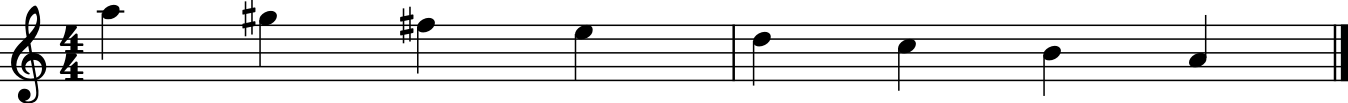

In [84]:
notes = "^treble c 4/4^a5/1 g#5/1 f#5/1 e5/1 d5/1 c5/1 b4/1 a4/1"
music(notes, True)
print("Descending Melodic Minor (A)")
music(notes)

Harmonic Minor (A)


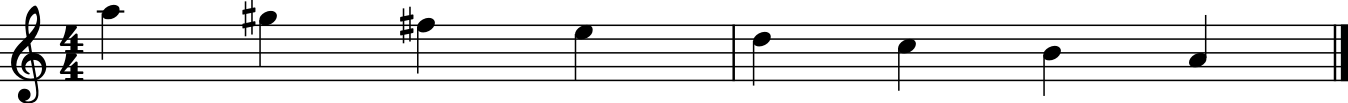

In [85]:
notes = "^treble c 4/4^a5/1 g#5/1 f#5/1 e5/1 d5/1 c5/1 b4/1 a4/1"
music(notes, True)
print("Harmonic Minor (A)")
music(notes)

The interval construction of the harmonic minor is:

> T S T T S m3 S

and the chords derived from the scale are shown in the following table:

|Numeral | Interval | Triad | Seventh |
| --- | --- | --- | --- |
| I | Tonic | Minor | Minor/Major Seventh |
| II | Supertonic | Diminished | Half Diminished Seventh |
| III | Mediant | Augmented | Augmented Major Seventh |
| IV | Subdominant | Minor | Minor Seventh |
| V | Dominant | Major | Dominant Seventh |
| VI | Submediant | Major | Major Seventh |
| VII | Leading Note | Diminished | Diminished Seventh |

Using the seventh chords from the minor key, the progression II → V → I becomes:

 > half-diminished seventh → dominant seventh → minor/major seventh

C Harmonic Minor


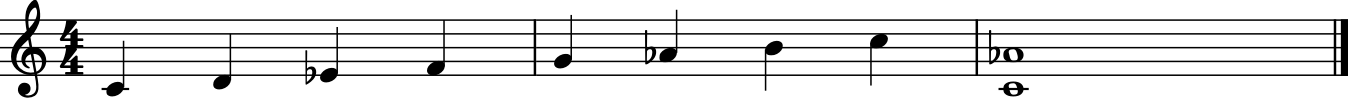

In [86]:
notes = "^treble c 4/4^c4/1 d4/1 e-4/1 f4/1 g4/1 a-4/1 b4/1 c5/1 (c4$a-4)/4"
music(notes, True)
print("C Harmonic Minor")
music(notes)

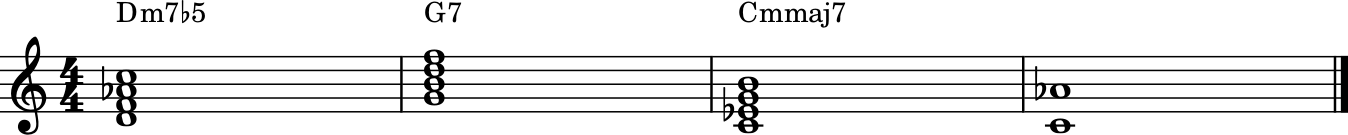

In [87]:
notes = "^treble c 4/4^!dm7b5 (d4$f4$a-4$c5)/4 !g7 (g4$b4$d5$f5)/4 !CmM7 (c4$e-4$g4$b4)/4 (c4$a-4)/4"
music(notes, True)
print("")
music(notes)

Note that the supertonic (II) in the minor key is a half-diminished chord. This is because the fifth note of the scale and the fifth of the chord form a diminished fifth interval with the root and not a perfect fifth as in the minor seventh. Because this is the only difference from the minor seventh chord, the half-diminished is also referred to as a *minor seventh flattened fifth* chord or *minor seven flat five*.

## 2.3 Sixth Chords

The tonic chords, *ie* the major seventh and minor/major seventh both contain a major seventh from the root. The major seventh can, at the player's discretion, be replaced by a major sixth as shown in the following examples:

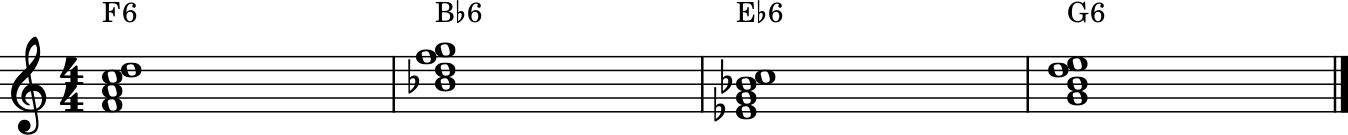

In [91]:
notes = "^treble c 4/4^!f6 (f4$a4$c5$d5)/4 !b-6 (b-4$d5$f5$g5)/4 !e-6 (e-4$g4$b-4$c5)/4 !g6 (g4$b4$d5$e5)/4"
music(notes, True)
music(notes)

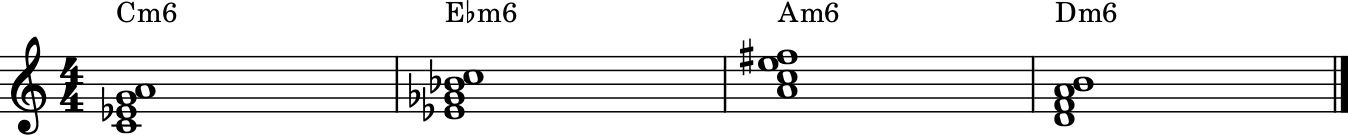

In [94]:
notes = "^treble c 4/4^!cm6 (c4$e-4$g4$a4)/4 !e-m6 (e-4$g-4$b-4$c5)/4 !am6 (a4$c5$e5$f#5)/4 !dm6 (d4$f4$a4$b4)/4"
music(notes, True)
music(notes)

In these examples the sixth is a constituent of the basic chord. It can only be used in this way on a tonic chord. If a 'sixth' is added to a dominant chord it is more correctly a 'thirteenth', being an embellishment rather than a basic constituent.

## 2.4 Altered Dominant Sevenths

The basic dominant seventh can be altered in two ways:
- by raising the fifth (sharp).
- by lowering the fifth (flat).
The dominant seventh with a raised fifth is also known as an *augmented seventh* chord.

These altered fifths are integral parts of the chords. Unlike the normal dominant seventh, the chords do not contain a perfect fifth. 

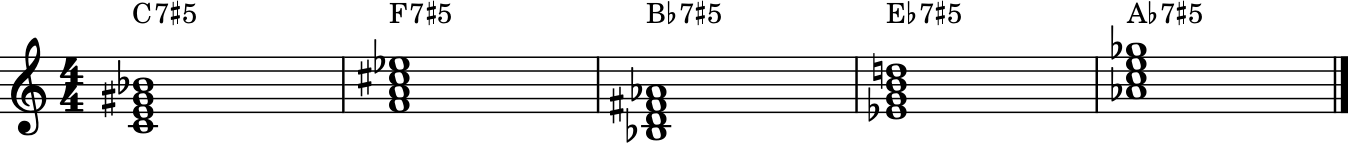

In [99]:
notes = "^treble c 4/4^!c7#5 (c4$e4$g#4$b-4)/4 !f7#5 (f4$a4$c#5$e-5)/4 !b-7#5 (b-3$d4$f#4$a-4)/4 !e-7#5 (e-4$g4$b4$d5)/4 !a-7#5 (a-4$c5$e5$g-5)/4"
music(notes, True)
music(notes)

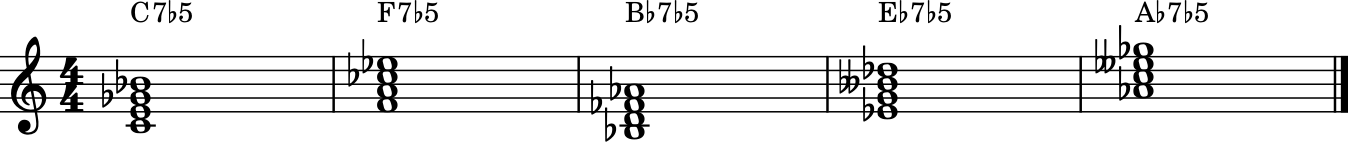

In [100]:
notes = "^treble c 4/4^!c7b5 (c4$e4$g-4$b-4)/4 !f7b5 (f4$a4$c-5$e-5)/4 !b-7b5 (b-3$d4$f-4$a-4)/4 !e-7b5 (e-4$g4$b--4$d-5)/4 !a-7b5 (a-4$c5$e--5$g-5)/4"
music(notes, True)
music(notes)

Note:
> C7#5 = C7(aug)

## 2.5 Reading and Writing Chord Symbols

By studying the chords within the major and minor scales we have encountered every basic chord type. Writing an example of each of these chords on the same root enables them to be easily compared at the piano. A chord symbol is added with each example. 

In [ ]:
notes = "^treble c 4/4^"
music(notes, True)
print("")
music(notes)

In [ ]:
notes = "^treble c 4/4^"
music(notes, True)
print("")
music(notes)